# Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic).

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

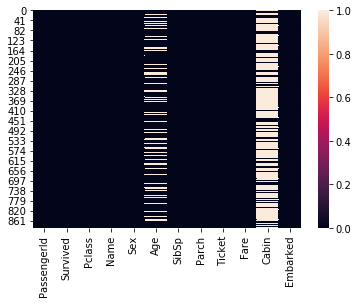

In [10]:
sns.heatmap(train.isnull())

In [12]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

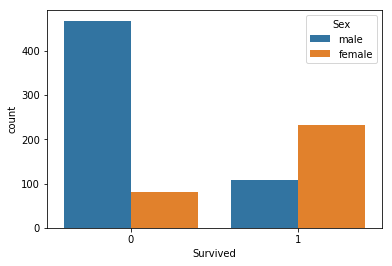

In [15]:
sns.countplot(x = 'Survived', hue = 'Sex', data=train)

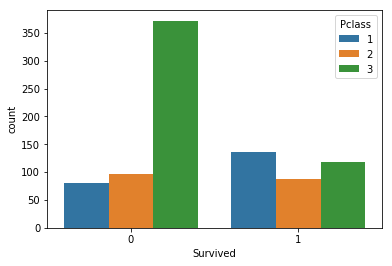

In [16]:
sns.countplot(x = 'Survived', hue = 'Pclass', data=train)

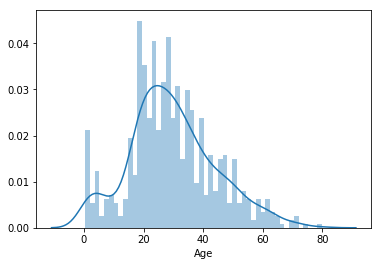

In [20]:
sns.distplot(train['Age'].dropna(), bins = 50)

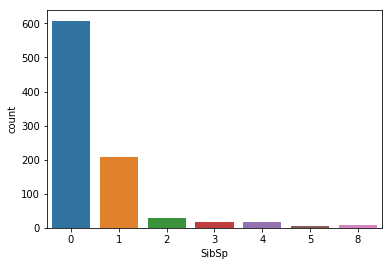

In [21]:
sns.countplot(x = 'SibSp', data=train)

In [22]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

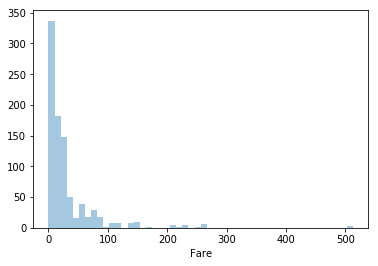

In [24]:
sns.distplot(train['Fare'], bins = 50, kde = False)

In [29]:
train['Age'].fillna(train['Age'].mean(), inplace = True)

In [40]:
train['Embarked'].fillna(train['Embarked'].mode(), inplace = True)

In [41]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [42]:
train.drop('Cabin', axis = 1, inplace =True)

In [50]:
train['Sex'] = pd.get_dummies(train['Sex'], drop_first=True)
train['Embarked'] = pd.get_dummies(train['Embarked'], drop_first=True)

In [53]:
train.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [54]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,0
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,0
3,4,1,1,0,35.000000,1,0,53.1000,0
4,5,0,3,1,35.000000,0,0,8.0500,0
5,6,0,3,1,29.699118,0,0,8.4583,1
6,7,0,1,1,54.000000,0,0,51.8625,0
7,8,0,3,1,2.000000,3,1,21.0750,0
8,9,1,3,0,27.000000,0,2,11.1333,0
9,10,1,2,0,14.000000,1,0,30.0708,0


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [57]:
X = train[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train['Survived']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lr = LogisticRegression()

In [64]:
lr.fit(X_train, y_train)

C:\Users\123\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [65]:
lr.score(X_train, y_train)

0.8033707865168539

In [66]:
lr.score(X_test, y_test)

0.7932960893854749

In [67]:
predictions = lr.predict(X_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

   micro avg       0.79      0.79      0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [72]:
confusion_matrix(y_test, predictions)

array([[90, 15],
       [22, 52]], dtype=int64)